<a href="https://colab.research.google.com/github/conextm/python/blob/main/Clase_11_Taller_de_an%C3%A1lisis_exploratorio_Samuel_Infante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de análisis exploratorio

En este taller el objetivo es que usted utilice las herramientas de análisis exploratorio que hemos adquirido para trabajar con

Al final de este taller la idea es que usted se encuentre en la capacidad de:
* Cargar una base de datos
* Familiarizarnos con la unidad de observación
* Desarrollar un breve proceso de limpieza de datos
* Dirigir un proceso de análisis exploratorio orientado a una pregunta de negocio

<sub>* Ejercicio de simulación pedagógica diseñado para el entrenamiento de competencias de análisis descriptivo de datos.</sub>

## Cámara de Comercio de Bogotá
Para este caso problema usted está analizando información sobre las **entidades en CCB** del registro de información financiera y general para el tercer trimestre de 2022 en la Cámara de Comercio de Bogotá.

La Cámara de Comercio se dispone a lanzar un **programa de entrenamiento** para fortalecer **las ventas las empresas**, y desea identificar en qué tipo de entidades debe focalizar los recursos. Para esto:

- La CCB cuenta con **registros detallados** de cada entidad registrada
- La idea es identificar si es mejor focalizar la convocatoria **por tamaño de empresa** o por **tipo de sociedad**.
- La matrícula mercantil aquí puesta es ficticia, como un id anónimo.

Antes de correr los análisis usted debe **explorar y limpiar** las bases de datos y posteriormente implementar visualizaciones que le permitan aproximarse a la pregunta:

¿Sobre qué tipo de empresas deberían prioriarse los entrenamientos para mejorar las ventas?

![Edificio de la Cámara de Comercio de Bogotá en la calle 26](https://upload.wikimedia.org/wikipedia/commons/1/1d/C%C3%A1mara_4_Comercio_Bogot%C3%A1_Cund%2C_Col.jpg)

### Cargar y observar los datos

In [7]:
# Importar pandas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import cv2

In [10]:
# Cargar datos
camara = pd.read_excel('2022-3_ccb_registros.xlsx')
print(camara.head())

   Matrícula              Indicador           Período   Año  \
0  5061891.0  Matricula No Renovada  Tercer Trimestre  2022   
1  5061892.0  Matricula No Renovada  Tercer Trimestre  2022   
2  5061893.0  Matricula No Renovada  Tercer Trimestre  2022   
3  5061894.0  Matricula No Renovada  Tercer Trimestre  2022   
4  5061895.0  Matricula No Renovada  Tercer Trimestre  2022   

                Organización Jurídica         Tamaño     Sector  \
0  Sociedad por Acciones Simplificada  Microempresas  Servicios   
1  Sociedad por Acciones Simplificada  Microempresas  Servicios   
2  Sociedad por Acciones Simplificada  Microempresas  Servicios   
3                     Persona Natural  Microempresas  Servicios   
4                            Limitada  Microempresas   Comercio   

                         Sección Actividad Económica  \
0                     L 68 ACTIVIDADES INMOBILIARIAS   
1       K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS   
2                     L 68 ACTIVIDADES INMOBILIARI

#### Ejercicio 1

In [16]:
General = pd.read_excel('2022-3_ccb_registros.xlsx', sheet_name='General')

Financiera = pd.read_excel('2022-3_ccb_registros.xlsx', sheet_name='Financiera')

**Explorar:** revisemos información sobre las columnas de cada tabla. Utilice las funciones info y head de Pandas para cada una de las 2 tablas.

In [18]:
print(General.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185495 entries, 0 to 185494
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Matrícula                     185495 non-null  float64
 1   Indicador                     185495 non-null  object 
 2   Período                       185495 non-null  object 
 3   Año                           185495 non-null  int64  
 4   Organización Jurídica         185495 non-null  object 
 5   Tamaño                        185494 non-null  object 
 6   Sector                        185495 non-null  object 
 7   Sección Actividad Económica   185495 non-null  object 
 8   CIIU                          185495 non-null  object 
 9   Cantidad de Establecimientos  185494 non-null  float64
 10  Personal Ocupado              185494 non-null  float64
 11  Importador Exportador         185145 non-null  object 
 12  Categoría                     185494 non-nul

In [19]:
print(Financiera.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185495 entries, 0 to 185494
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Matrícula                 185495 non-null  float64
 1   Total Valor Activos       185494 non-null  float64
 2   Total Valor Pasivos       185494 non-null  float64
 3   Total Valor Patrimonio    185494 non-null  float64
 4   Total Valor Ventas Netas  185494 non-null  float64
dtypes: float64(5)
memory usage: 7.1 MB
None


In [20]:
print(General.head())

   Matrícula              Indicador           Período   Año  \
0  5061891.0  Matricula No Renovada  Tercer Trimestre  2022   
1  5061892.0  Matricula No Renovada  Tercer Trimestre  2022   
2  5061893.0  Matricula No Renovada  Tercer Trimestre  2022   
3  5061894.0  Matricula No Renovada  Tercer Trimestre  2022   
4  5061895.0  Matricula No Renovada  Tercer Trimestre  2022   

                Organización Jurídica         Tamaño     Sector  \
0  Sociedad por Acciones Simplificada  Microempresas  Servicios   
1  Sociedad por Acciones Simplificada  Microempresas  Servicios   
2  Sociedad por Acciones Simplificada  Microempresas  Servicios   
3                     Persona Natural  Microempresas  Servicios   
4                            Limitada  Microempresas   Comercio   

                         Sección Actividad Económica  \
0                     L 68 ACTIVIDADES INMOBILIARIAS   
1       K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS   
2                     L 68 ACTIVIDADES INMOBILIARI

In [21]:
print(Financiera.head())

   Matrícula  Total Valor Activos  Total Valor Pasivos  \
0  5061891.0           35936379.0          204403836.0   
1  5061892.0          342953600.0          200448883.0   
2  5061893.0            9500000.0            3545000.0   
3  5061894.0           15693250.0            1221500.0   
4  5061895.0           99019844.0           64768753.0   

   Total Valor Patrimonio  Total Valor Ventas Netas  
0              35936379.0                       0.0  
1             342953600.0                       0.0  
2               9500000.0                       0.0  
3              15693250.0                       0.0  
4              99019844.0                       0.0  


#### Ejercicio 2

Describa brevemente qué tipo de información tiene cada data frame:

Financiera: Se enfoca en datos financieros, como activos, pasivos, patrimonio neto y ventas netas, proporcionando información crucial para evaluar la salud financiera y el rendimiento económico de las organizaciones.

General: Contiene información general sobre diversas entidades, incluyendo detalles legales, tamaño, sector y actividad económica, así como información geográfica detallada.



### Limpieza

#### Ejercicio 3

**Ejercicio**: Note que una de las columnas (Total Valor Ventas Netas) parece tener sólamente valores cero. Detalle esta columna para revisar qué tipos de valores tiene. Puede utilizar la función describe para obtener los cuartiles.





In [50]:
print(camara_union['Total Valor Ventas Netas'].describe())

count    1.854940e+05
mean     1.949811e+08
std      2.237441e+10
min     -2.087387e+09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.907010e+12
Name: Total Valor Ventas Netas, dtype: float64


El valor mínimo es negativo, y tenemos que ¡al menos el 75% de los datos es cero!

In [51]:
# Vamos a quedarnos sólamente con las filas que tienen ventas mayores a cero.
# Es decir, hacemos elegibles sólamente a las empresas que han vendido algo en
# este periodo.
no_utilizar = camara_financiera['Total Valor Ventas Netas'] <= 0
no_utilizar

0         False
1         False
2         False
3         False
4         False
          ...  
185490    False
185491    False
185492    False
185493    False
185494    False
Name: Total Valor Ventas Netas, Length: 185495, dtype: bool

In [52]:
# Usamos loc siempre que queremos reemplazar valores utilizando condiciones lógicas
camara_financiera.loc[no_utilizar, 'Total Valor Ventas Netas'] = np.nan

In [53]:
# Así, tenemos:
camara_financiera['Total Valor Ventas Netas'].describe()

count    3.995800e+04
mean     9.052059e+08
std      4.820130e+10
min      1.000000e+00
25%      7.682892e+06
50%      5.121050e+07
75%      2.391192e+08
max      7.907010e+12
Name: Total Valor Ventas Netas, dtype: float64

### Unión

#### Ejercicio 4

**Ejercicio**: Considere qué tipo de unión es adecuada entre las dos tablas para poder relacionar ventas con el tipo de sociedad/entidad. Impleméntela a continuación. En caso de ser una unión horizontal considere todas las filas.

In [58]:
camara_union= pd.merge(General, Financiera, on='Matrícula', how='left')

In [65]:
camara_union.head(3)

,Matrícula,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,...,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
0,5061891.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",ENGATIVA,SANTA MONICA,2.0,35936379.0,204403836.0,35936379.0,0.0
1,5061892.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS,6611 ADMINISTRACIÓN DE MERCADOS FINANCIEROS,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,EL NOGAL,2.0,342953600.0,200448883.0,342953600.0,0.0
2,5061893.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,PRADO VERANIEGO NORTE,2.0,9500000.0,3545000.0,9500000.0,0.0


In [66]:
# Contar los valores en la columna 'Matrícula'
print(camara_union['Matrícula'].value_counts())

Matrícula
5.061891e+06    1
5.185548e+06    1
5.185550e+06    1
5.185551e+06    1
5.185552e+06    1
               ..
5.123724e+06    1
5.123725e+06    1
5.123726e+06    1
5.123727e+06    1
5.247385e+06    1
Name: count, Length: 185495, dtype: int64


Tenga en cuaneta si la cantidad de filas que pegaron tiene sentido.



* El resultado muestra que todas las filas del dataframe resultante tienen una coincidencia entre las dimensiones de General y Financiera, lo que indica una unión exitosa.



### Gráficos

Para elaborar el análisis gráfico, se le sugiere un procedimiento tipo *drill down*.

Esto es:</br>
1) Formalizamos estadísticamente la pregunta de negocio</br>
2) Hacemos visualizaciones univariadas</br>
3) Hacemos visualizaciones cruzadas

Primero hagamos un par de procedimientos de referencia. Primero, veamos la distribución de las ventas netas por tipo de organización jurídica. Eso nos da una idea de qué magnitud tienen los valores.

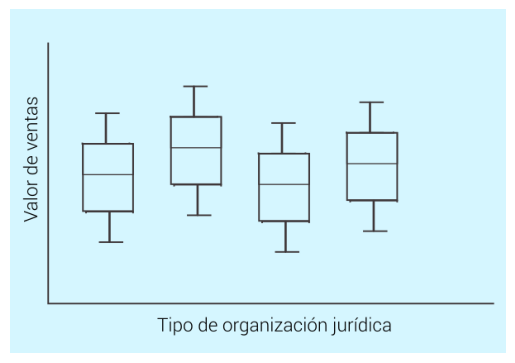

In [67]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('g1.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Sociedad por Acciones Simplificada'),
  Text(1, 0, 'Persona Natural'),
  Text(2, 0, 'Limitada'),
  Text(3, 0, 'Empresa unipersonal'),
  Text(4, 0, 'Anonima'),
  Text(5, 0, 'Comandita Simple'),
  Text(6, 0, 'Extranjera'),
  Text(7, 0, 'Empresa Asociativa de trabajo'),
  Text(8, 0, 'Comandita por acciones'),
  Text(9, 0, 'Colectiva'),
  Text(10, 0, 'Empresa industrial y Cial del est')])

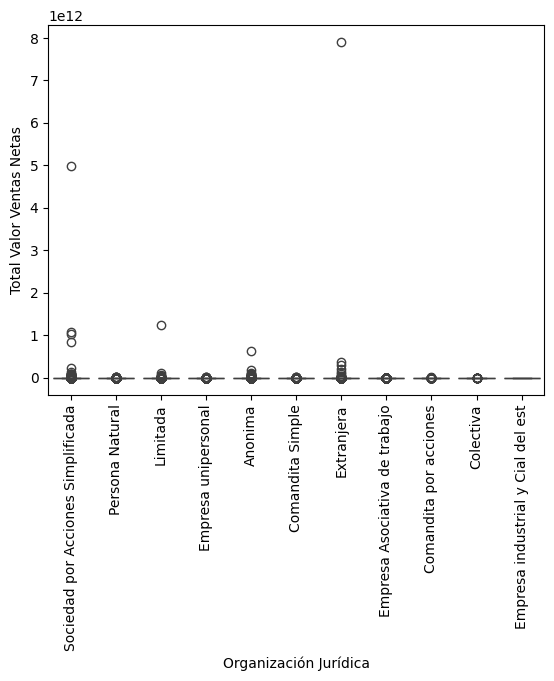

In [69]:
sns.boxplot(x="Organización Jurídica", y="Total Valor Ventas Netas", data=camara_union)
plt.xticks(rotation=90)

**Como tenemos unos datos muy altos, parecen muy atípicos. Lo mejor es filtrar por tamaño de empresa. Y podemos no considerar valores atípicos.**

#### Ejercicio 5
Lea y modifique el siguiente código para observar empresas grandes en el gráfico.

Text(0.5, 1.0, 'Distribución de ventas de Microempresas por tipo de persona jurídica')

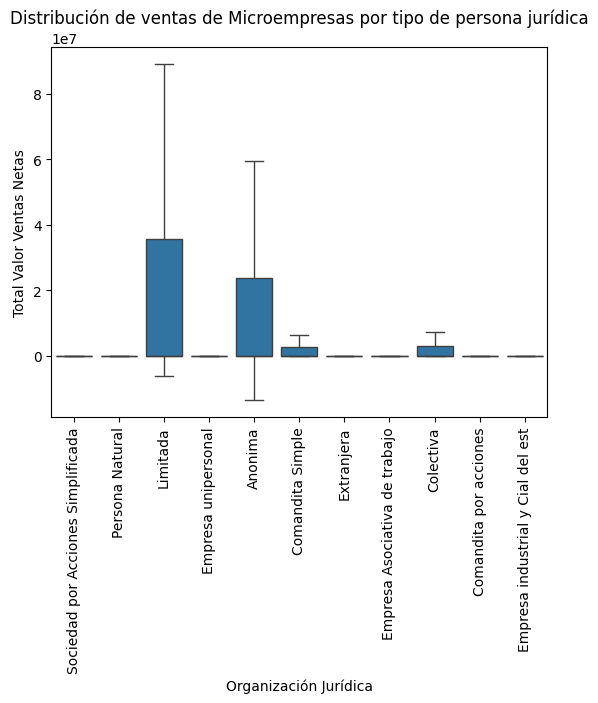

In [71]:
# Le podemos cambiar el tamaño al que queramos
tamanio1 = camara_union['Tamaño'] == 'Microempresas'
tamanio2 = camara_union['Tamaño'] == 'Pequeñas'
tamanio3 = camara_union['Tamaño'] == 'Medianas'
tamanio4 = camara_union['Tamaño'] == 'Grandes'

micro = sns.boxplot(x="Organización Jurídica", y="Total Valor Ventas Netas", data=camara_union[tamanio1], showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribución de ventas de Microempresas por tipo de persona jurídica')

### Drill down


Vamos a jugar principalmente con:

* Tamaño de empreas
* Tipo de organización jurídica
* Total de ventas

Primero identificamos cuántas empresas se encuentran en cada categoría de las vairables categóricas:

In [73]:
# Número de empresas en cada tamaño
camara_union['Tamaño'].value_counts()

Tamaño
Microempresas    171836
Pequeñas          11839
Medianas           1566
Grandes             253
Name: count, dtype: int64

In [75]:
# EJERCICIO OPCIONAL: Calcule el número de empresas en cada categoría de organización jurídica inspirándose en la celda anterior
camara_union['Organización Jurídica'].value_counts()

Organización Jurídica
Sociedad por Acciones Simplificada    61897
Persona Natural                       56738
Limitada                              43944
Empresa unipersonal                   10904
Anonima                                6010
Comandita Simple                       3616
Extranjera                             1022
Empresa Asociativa de trabajo           903
Comandita por acciones                  362
Colectiva                                98
Empresa industrial y Cial del est         1
Name: count, dtype: int64

Ahora calculamos el total de las ventas netas de todas las empresas, para tener una magnitud superior contra la cual comparar los valores.

In [76]:
# Total de referencia de ventas netas
Financiera['Total Valor Ventas Netas'].sum()

36167827457061.0

### Gráficos por grupos
Ahora comencemos a elaborar un par de gráficos de ventas netas por cada variable categórica:

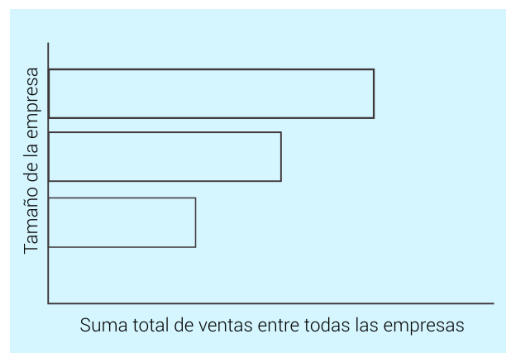

In [88]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('g3.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

In [92]:
# Agrupamos por Tamaño univariadamente para lograr esta gráfica, y calculamos la suma de ventas netas, y la cuenta de empresas en cada grupo
camara_union_T = camara_union.groupby('Tamaño').agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
camara_union_T = camara_union.rename(columns={'Matrícula': 'Empresas'})
camara_union_T = camara_union.sort_values('Total Valor Ventas Netas',ascending=False)

In [94]:
camara_union_T.head()

,Matrícula,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,...,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
136469,5.198360e+06,Matricula No Renovada,Tercer Trimestre,2022,Extranjera,Pequeñas,Servicios,H 49-53 TRANSPORTE Y ALMACENAMIENTO,4923 TRANSPORTE DE CARGA POR CARRETERA,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,QUINTA CAMACHO,1.0,9.236890e+08,6.772870e+11,9.236890e+11,7.907010e+12
13529,5.075420e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Grandes,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4659 COMERCIO AL POR MAYOR DE OTROS TIPOS D...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,CHICO NORTE III,1.0,1.913823e+12,8.157681e+11,1.913823e+12,4.983226e+12
72495,5.134386e+06,Matricula No Renovada,Tercer Trimestre,2022,Limitada,Pequeñas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4663 COMERCIO AL POR MAYOR DE MATERIALES DE...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,AURES II,1.0,7.412830e+08,6.511240e+11,7.412830e+11,1.235575e+12
76175,5.138066e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Grandes,Servicios,N 77-82 ACTIVIDADES DE SERVICIOS ADMINISTRATIV...,8299 OTRAS ACTIVIDADES DE SERVICIO DE APOYO...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,CHICO NORTE III,1.0,2.539298e+12,1.611575e+12,2.539298e+12,1.088542e+12
16488,5.078379e+06,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Grandes,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4661 COMERCIO AL POR MAYOR DE COMBUSTIBLES ...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",NaN,NaN,1.0,2.556587e+11,2.455695e+11,2.556587e+11,1.027581e+12


[Text(0.5, 1.0, 'Composición de las ventas por tipo de empresa')]

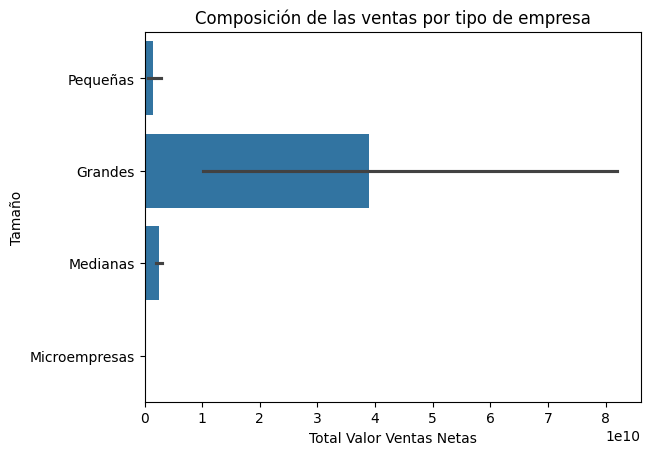

In [96]:
sns.barplot(y='Tamaño',x='Total Valor Ventas Netas',data=camara_union_T).set(title = "Composición de las ventas por tipo de empresa")

#### Ejercicio 6
Elabore el siguiente gráfico para continuar el análisis.
Puede inspirarse en el algoritmo del anterior.

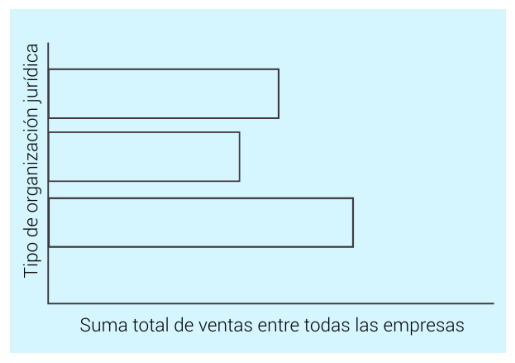

In [97]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('g2.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

[Text(0.5, 1.0, 'Composición de las ventas por tipo de empresa')]

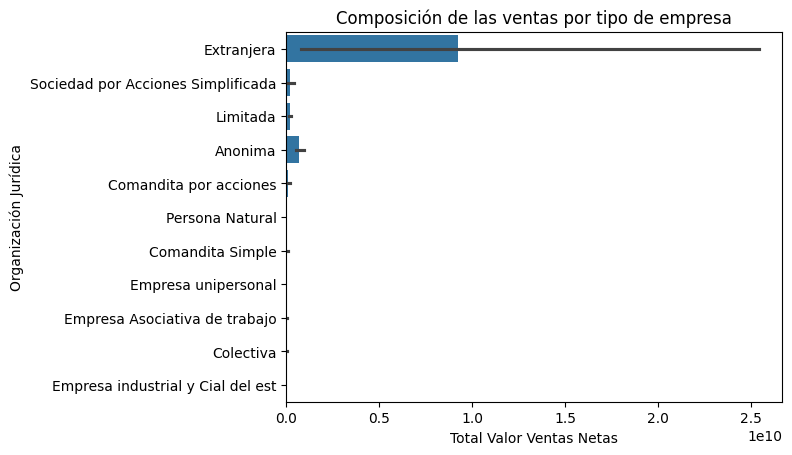

In [98]:
# Grupos univariados por organización jurídica EJERCICIO
sns.barplot(y='Organización Jurídica',x='Total Valor Ventas Netas',data=camara_union_T).set(title = "Composición de las ventas por tipo de empresa")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


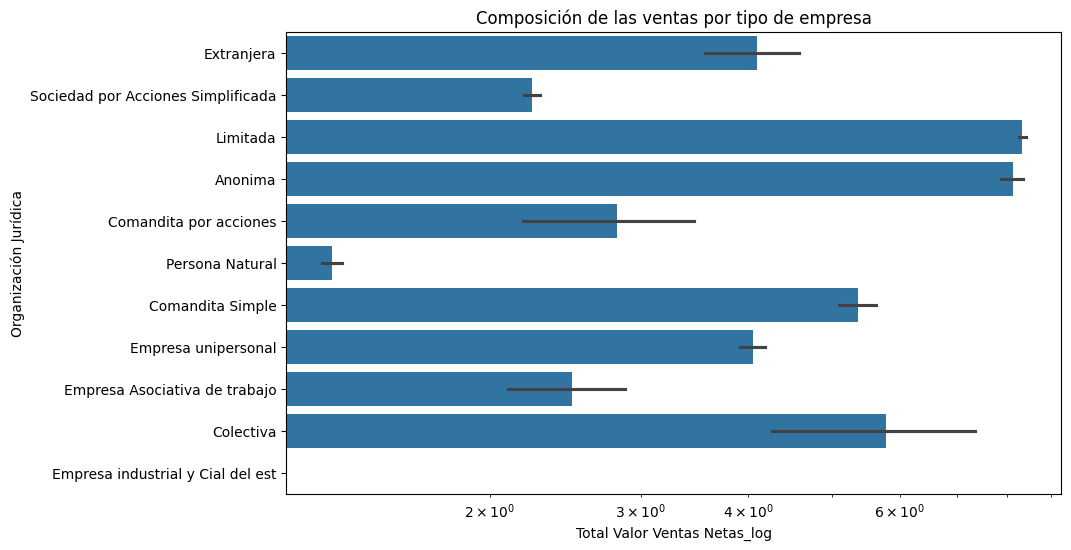

In [100]:
# Aplicar la transformación logarítmica a los datos en el eje x
camara_union_T['Total Valor Ventas Netas_log'] = np.log(camara_union_T['Total Valor Ventas Netas'] + 1)  # Sumamos 1 para evitar log(0)

# Crear el gráfico de barras con escala logarítmica en el eje x
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.barplot(y='Organización Jurídica', x='Total Valor Ventas Netas_log', data=camara_union_T)

# Establecer título del gráfico
plt.title("Composición de las ventas por tipo de empresa")

# Etiquetas del eje x en escala logarítmica
plt.xscale('log')

# Mostrar el gráfico
plt.show()

#### Ejercicio 7
Finalmente combinamos los grupos para lograr una gráfica como la siguiente:

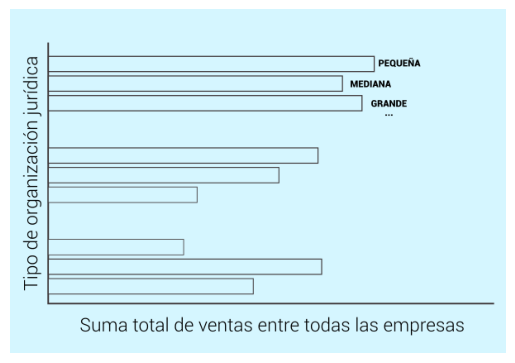

In [101]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread('g4.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

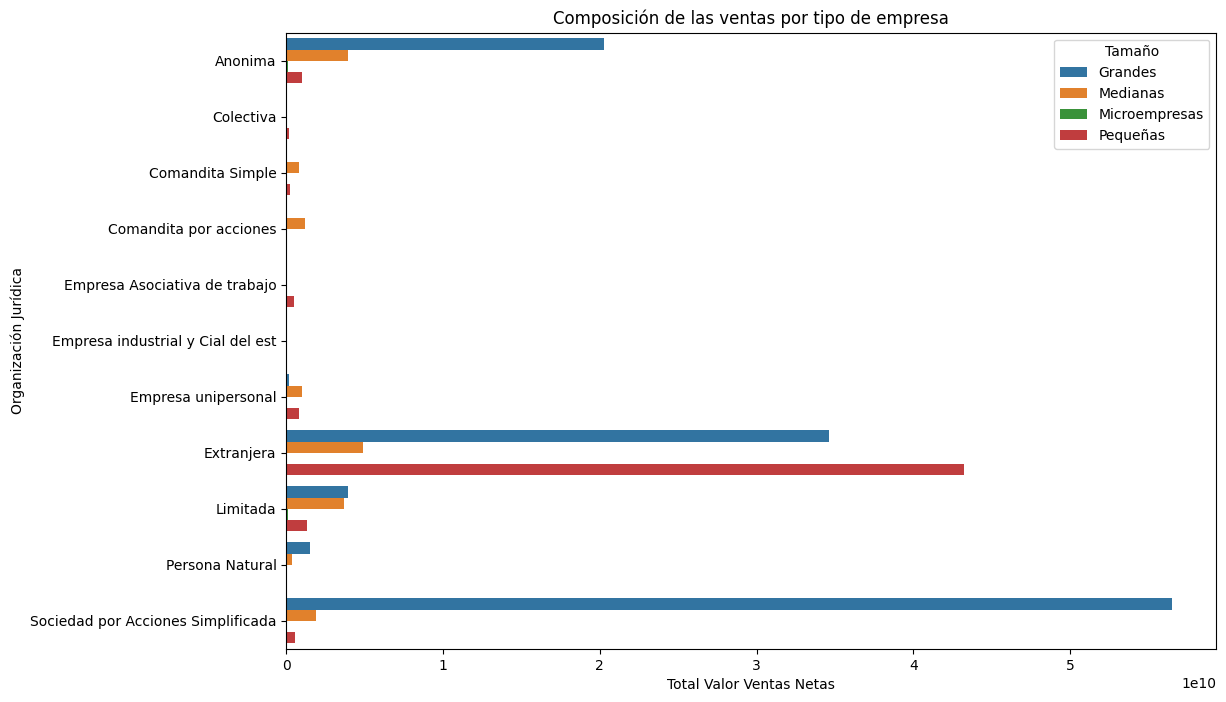

In [106]:
grouped_data = camara_union_T.groupby(['Organización Jurídica', 'Tamaño'])['Total Valor Ventas Netas'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Valor Ventas Netas', y='Organización Jurídica', hue='Tamaño', data=grouped_data)
plt.title("Composición de las ventas por tipo de empresa")

plt.show()

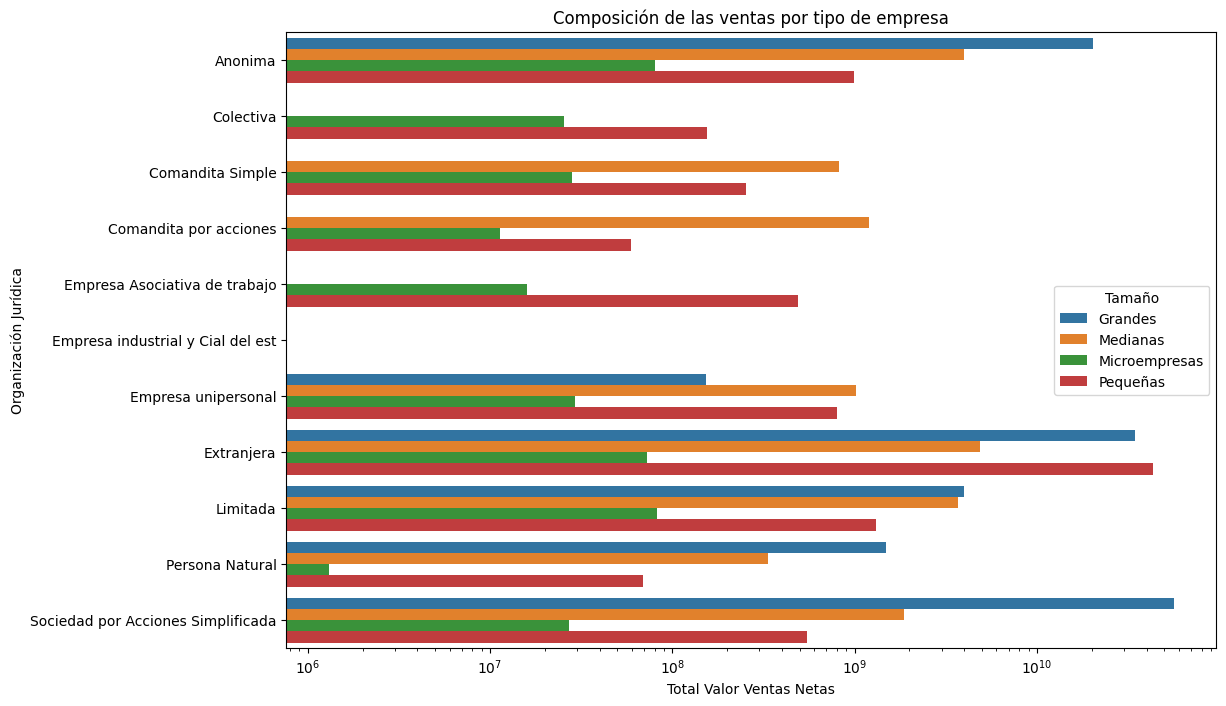

In [107]:
grouped_data = camara_union_T.groupby(['Organización Jurídica', 'Tamaño'])['Total Valor Ventas Netas'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Valor Ventas Netas', y='Organización Jurídica', hue='Tamaño', data=grouped_data)
plt.title("Composición de las ventas por tipo de empresa")
plt.xscale('log')
plt.show()

In [103]:
# Imprimir la tabla de datos utilizada en el último gráfico
print(grouped_data)

                 Organización Jurídica         Tamaño  \
0                              Anonima        Grandes   
1                              Anonima       Medianas   
2                              Anonima  Microempresas   
3                              Anonima       Pequeñas   
4                            Colectiva       Medianas   
5                            Colectiva  Microempresas   
6                            Colectiva       Pequeñas   
7                     Comandita Simple        Grandes   
8                     Comandita Simple       Medianas   
9                     Comandita Simple  Microempresas   
10                    Comandita Simple       Pequeñas   
11              Comandita por acciones        Grandes   
12              Comandita por acciones       Medianas   
13              Comandita por acciones  Microempresas   
14              Comandita por acciones       Pequeñas   
15       Empresa Asociativa de trabajo  Microempresas   
16       Empresa Asociativa de 

## Recomendaciones
*(Recuerde la pregunta de negocio original y formule sus recomendaciones a continuación)*

Al analizar detalladamente la tabla de datos proporcionada, se identifican claramente las empresas con Organización Jurídica "Persona Natural", "Microempresas", "Empresas Asociativas de Trabajo" y "Empresas Industriales y Comerciales del Estado" como las que registran ventas promedio más bajas. Por consiguiente, concentrar los entrenamientos en estos sectores específicos podría ser la estrategia más efectiva para impulsar el crecimiento de las ventas.

Para mejorar las ventas, se recomienda enfocar los esfuerzos de capacitación en las microempresas, ya que muestran un desempeño promedio más bajo en términos de ventas en comparación con otros tipos de empresas. Al identificar este segmento como un área de oportunidad clave, se puede implementar un programa de entrenamiento específicamente diseñado para abordar las necesidades y desafíos únicos que enfrentan las microempresas en el proceso de venta.